<a href="https://colab.research.google.com/github/ivandenb/MAT-442-Fall-2024-/blob/main/HW4_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4.1 and 4.2 Spectral Graph Bipartitioning**

4.2 Graph and Graph Modeling

First we will create a graph G to be the model and have it have 14 nodes

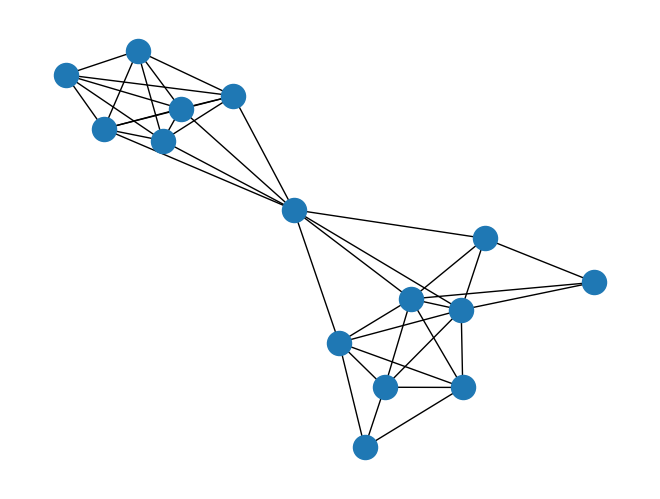

In [35]:
#imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#plot the geometric graph (code help from internet)
G = nx.random_geometric_graph(15, 0.4)

nx.draw(G)


We will then create a laplacian matrix from the data given above

In [36]:
# Create the Laplacian matrix (help from internet)
L = nx.laplacian_matrix(G).toarray()
L

array([[ 5,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1],
       [ 0,  7, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0],
       [ 0, -1,  5, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0],
       [ 0, -1, -1,  5,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0],
       [ 0, -1,  0,  0,  8,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0],
       [ 0, -1,  0,  0,  0,  3, -1,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0, -1,  0,  0, -1, -1,  4,  0,  0,  0,  0,  0,  0, -1,  0],
       [-1,  0,  0,  0, -1,  0,  0,  6, -1, -1,  0, -1,  0,  0, -1],
       [-1,  0,  0,  0, -1,  0,  0, -1,  6, -1,  0, -1,  0,  0, -1],
       [-1,  0,  0,  0, -1,  0,  0, -1, -1,  6,  0, -1,  0,  0, -1],
       [ 0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  6,  0, -1, -1,  0],
       [-1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,  6,  0,  0, -1],
       [ 0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  3,  0,  0],
       [ 0, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0,  7,  0],
       [-1,  0,  0,  0,  0,  0,  0

Now we will do a spectral graphing bipartition of another random set of data

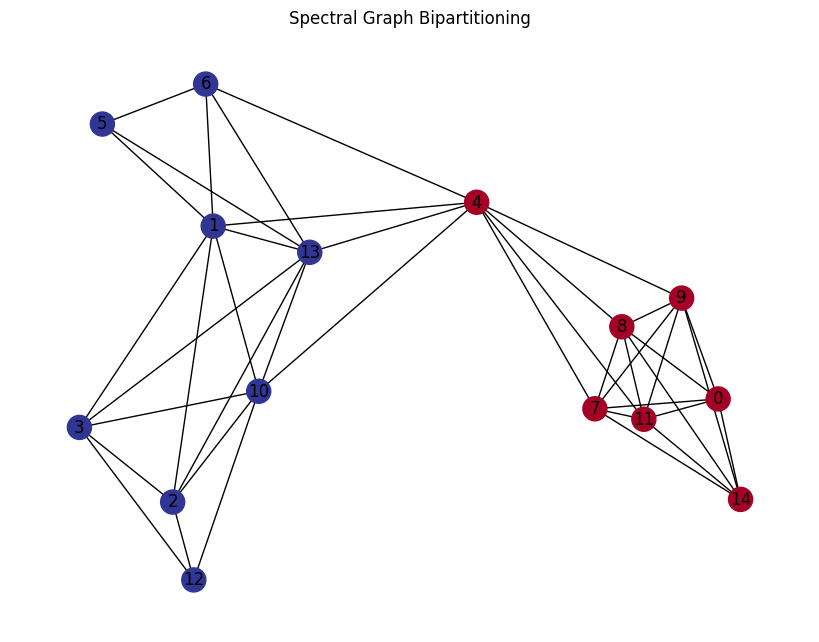

In [38]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# Find the eigenvector corresponding to the second smallest eigenvalue
second_smallest_eigenvalue_index = np.argsort(eigenvalues)[1]
second_eigenvector = eigenvectors[:, second_smallest_eigenvalue_index]


# Partition the nodes based on the sign of the second eigenvector's components
partition = [1 if val >= 0 else 0 for val in second_eigenvector]

# Draw the graph with nodes colored according to the partition
plt.figure(figsize=(8, 6))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_color=partition, cmap=plt.cm.RdYlBu, with_labels=True)#assistamce with coloring
plt.title("Spectral Graph Bipartitioning")
plt.show()



And seen above is a partitioned graph.